In [3]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


PRIMEIRO PASSO: IMPORTANDO BIBLIOTECAS

In [8]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB       #É GAUSSIANA?
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, precision_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, PowerTransformer, MinMaxScaler , StandardScaler 
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

SEGUNDO PASSO: CARREGANDO E LENDO OS CONJUNTOS DE DADOS

In [40]:
data_train = pd.read_csv("/Users/luisguedes/Desktop/UFRJ/train.csv", index_col=0)

In [41]:
data_test= pd.read_csv("/Users/luisguedes/Desktop/UFRJ/CPS-833/test.csv", index_col=0)

In [42]:
df=pd.read_csv('/Users/luisguedes/Desktop/UFRJ/CPS-833/obesitydataset_raw_and_data_sinthetic.csv')
data_original=pd.read_csv('/Users/luisguedes/Desktop/UFRJ/CPS-833/obesitydataset_raw_and_data_sinthetic.csv')

In [43]:
data_test.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
id,,,,,,,,,,,,,,,,
20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [44]:
if 'id' not in data_test.columns:
    # Reseta o índice para transformar 'id' em uma coluna regular.
    data_test.reset_index(inplace=True)
    # Renomeia a coluna de 'index' para 'id' se ainda não foi renomeada.
    if data_test.columns[0] == 'index':
        data_test.rename(columns={'index': 'id'}, inplace=True)

In [45]:
print(data_test.head())

      id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportatio

In [46]:
data_train.reset_index(drop=True, inplace=True)
data_train.index = range(1, len(data_train) + 1)
# Remove Id da tabela data_train

In [47]:
data_concat = pd.concat([data_train, data_original], ignore_index=True)
# A função pd.concat() está sendo usada para concatenar dois DataFrames pandas, 
# data_train e data_original, ao longo do eixo da linha (que é o eixo padrão para concatenação).

In [48]:
data_concat.shape

(22869, 17)

In [49]:
data_train.shape

(20758, 17)

In [50]:
data_original.shape

(2111, 17)

In [52]:
data_test.shape

(13840, 17)

FAVC: Significa “Frequência de consumo de alimentos altamente calóricos”. Indica com que frequência o indivíduo consome alimentos com alto teor calórico.

FCVC: Significa “Frequência de consumo de vegetais”. Esta coluna representa a frequência com que o indivíduo consome vegetais.

NCP: Significa “Número de refeições principais”. Indica o número de refeições principais (café da manhã, almoço, jantar) que o indivíduo realiza no dia.

CAEC: Significa “Consumo de alimentos entre as refeições”. Esta coluna representa se o indivíduo consome alimentos entre as refeições e, em caso afirmativo, com que frequência.

SMOKE: Indica se o indivíduo é fumante ou não.

CH2O: Representa a quantidade de água consumida diariamente pelo indivíduo.

SCC: Significa “Monitoramento do consumo de calorias”. Esta coluna pode indicar se o indivíduo monitora seu consumo de calorias.

FAF: Significa “Frequência de atividade física”. Representa a frequência com que o indivíduo pratica atividade física.

TUE: Significa “Tempo usando dispositivos tecnológicos”. Esta coluna indica a quantidade de tempo que o indivíduo gasta utilizando dispositivos tecnológicos.

CALC: Significa “Consumo de álcool”. Esta coluna representa se o indivíduo consome álcool e, em caso afirmativo, com que frequência.

MTRANS: Significa “Modo de transporte”. Esta coluna indica o principal meio de transporte utilizado pelo indivíduo.

NObeyesdad: Esta coluna provavelmente representa a variável alvo, indicando o nível de risco de obesidade ou a classificação da obesidade com base nos recursos fornecidos.

In [53]:
data_concat.duplicated().sum()

24

In [54]:
data_concat=data_concat.drop_duplicates()

In [56]:
data_concat.shape

(22845, 17)

In [57]:
data_test.shape

(13840, 17)

TERCEIRO PASSO: VISÃO GERAL DOS CONJUNTOS DE DADOS

In [58]:
data_concat.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,22845.000000,22845.000000,22845.000000,22845.000000,22845.000000,22845.000000,22845.000000,22845.000000
mean,23.888513,1.700467,87.793761,2.443675,2.755837,2.027165,0.984585,0.620984
std,5.755338,0.087865,26.363367,0.533392,0.711185,0.608479,0.839728,0.602802
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.755907,0.015860,0.000000
50%,22.815416,1.700000,84.000000,2.393837,3.000000,2.000000,1.000000,0.582840
75%,26.000000,1.763029,111.531208,3.000000,3.000000,2.531984,1.600431,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [60]:
data_concat.shape

(22845, 17)

QUARTO PASSO: ANÁLISE EXPLORATÓRIA DOS DADOS

In [61]:
numerical_features = data_concat.select_dtypes('number').columns
numerical_features

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [62]:
categorical_features = data_concat.select_dtypes(include=['object', 'category']).columns
#categorical_features = categorical_features.drop('NObeyesdad')
categorical_features

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

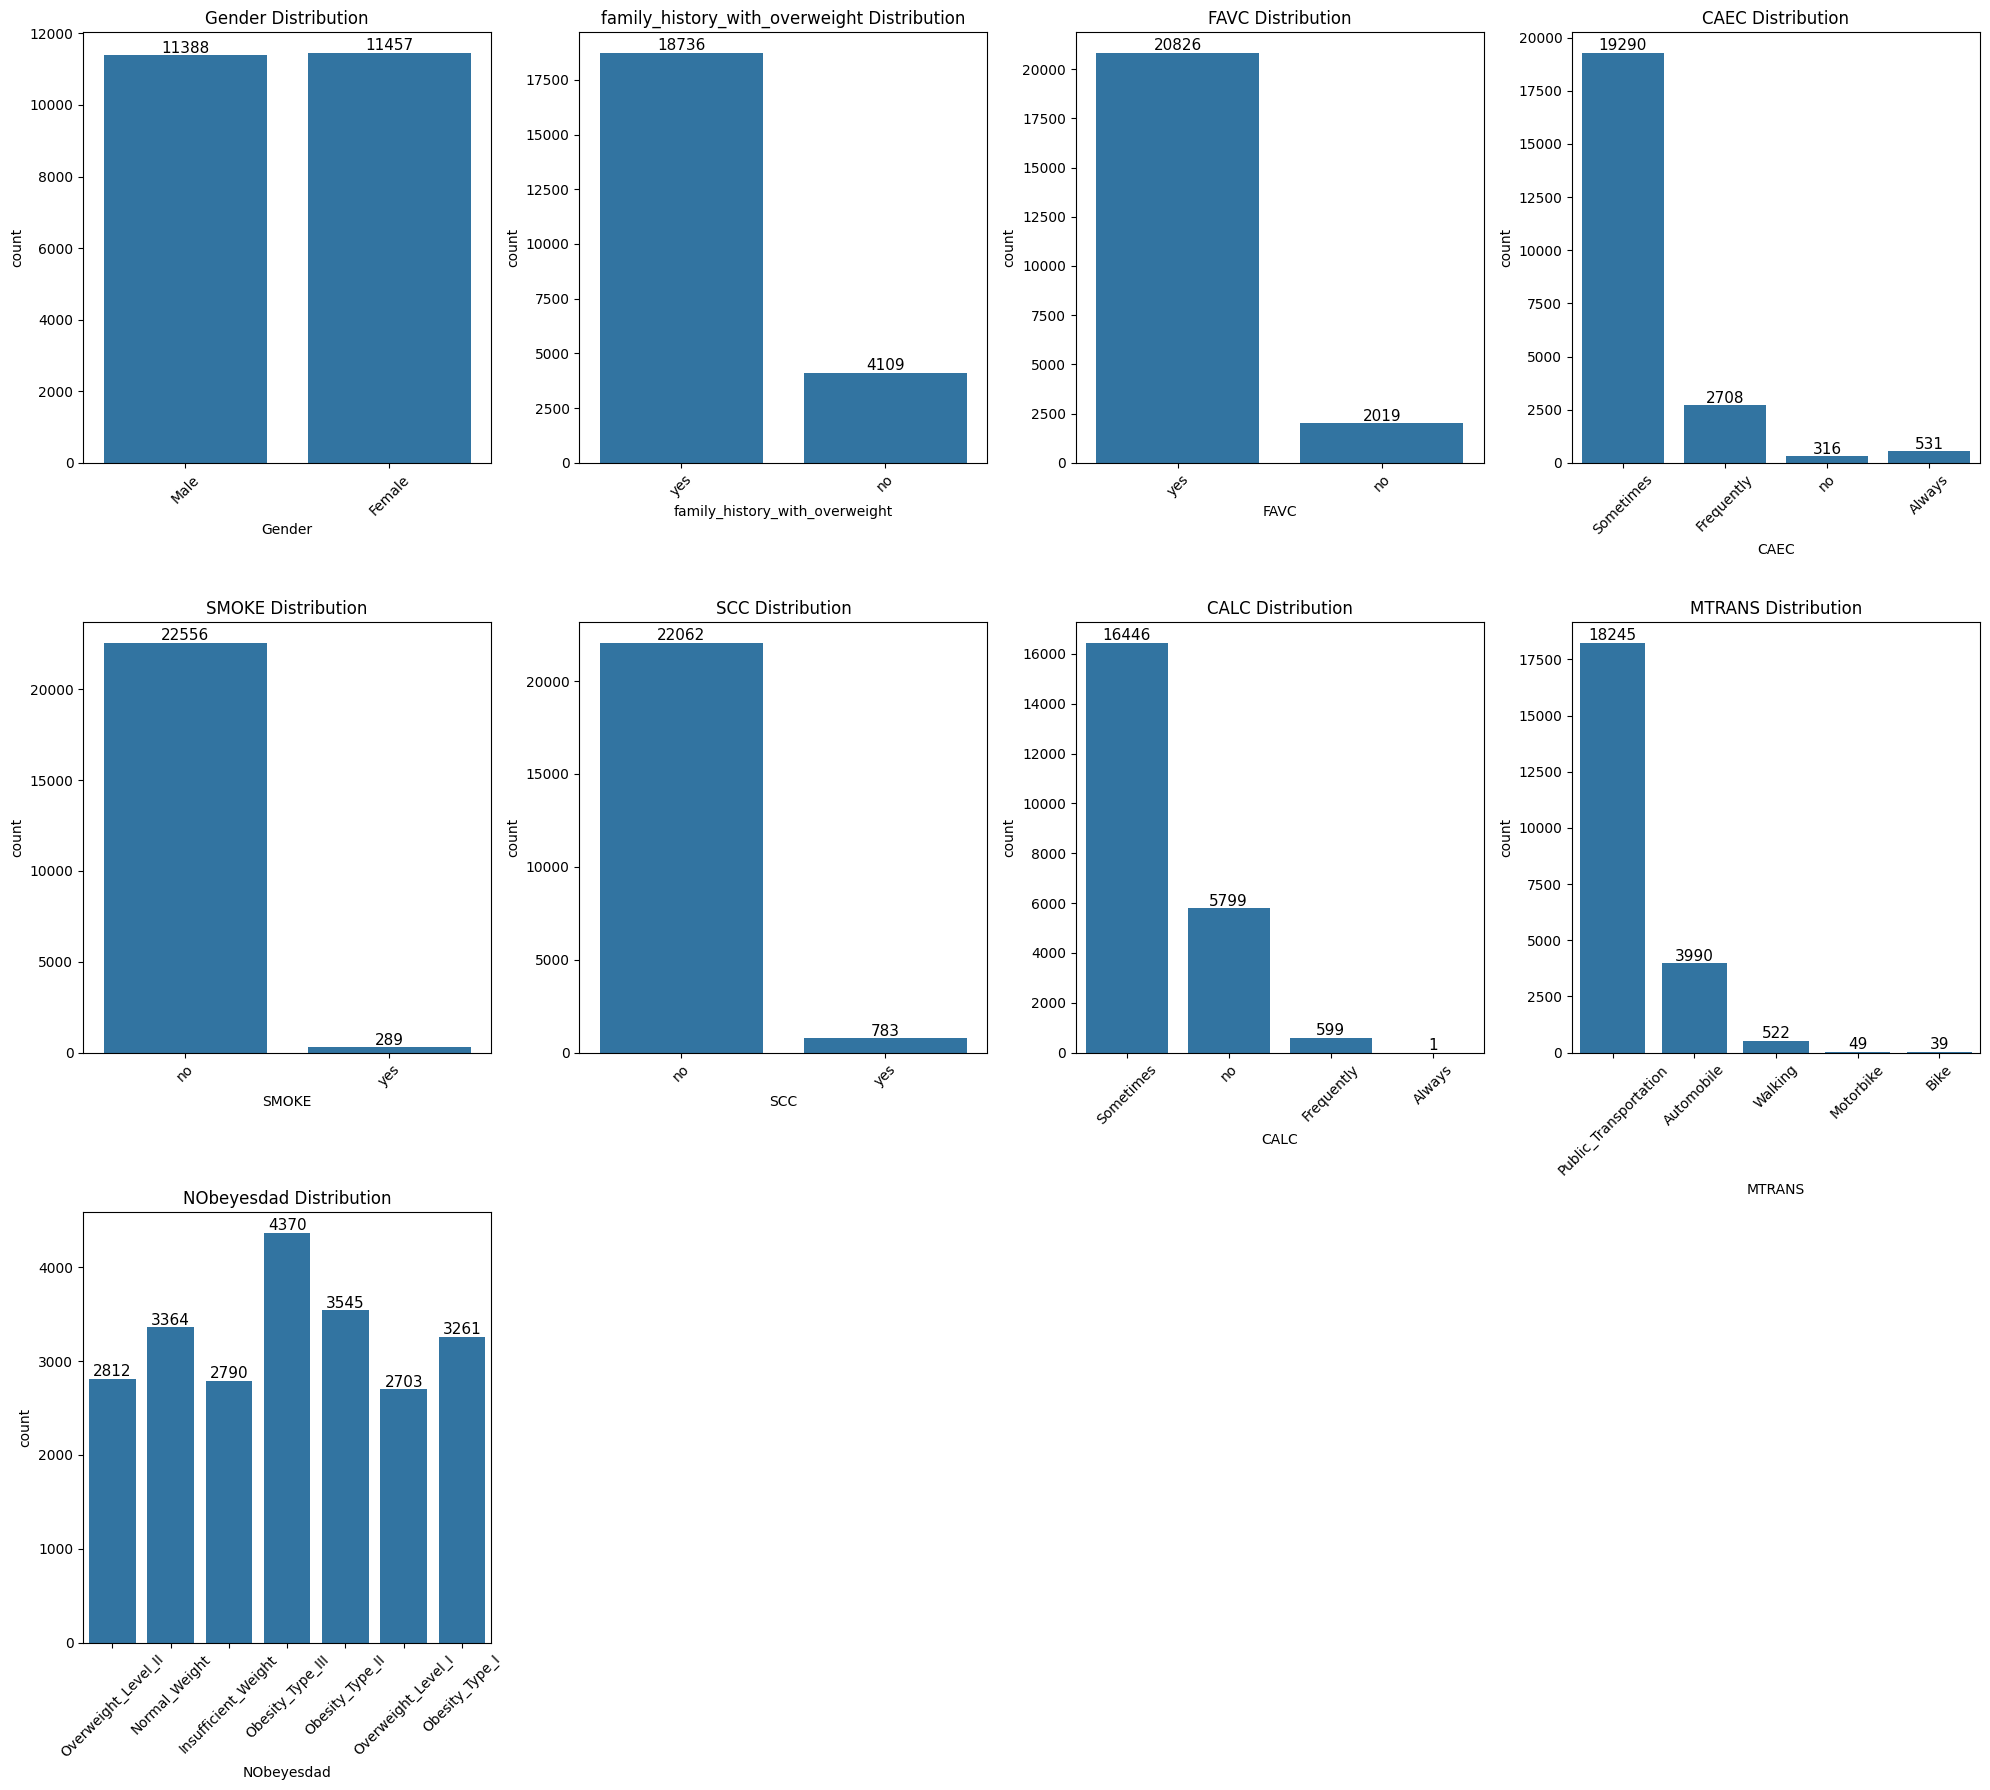

In [64]:
num_cols = len(categorical_features)
num_rows = -(-num_cols // 4)  

plt.figure(figsize=(20, 6 * num_rows))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(num_rows, 4, i)
    ax = sns.countplot(x=col, data=data_concat)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

# Plotagem de gráficos para análise de balanceamento.

In [66]:
data_concat.shape


(22845, 17)

BALANCEAMENTO? 
Resp. As classes se mostram relativamente balanceadas. No entanto, merece atenção o fato de que family_history_with_overweight pode enviesar os dados. Técnica SMOTE poderia ter sido aplicada? Foi. Não se obteve um ganho que justificasse a manipulação do atributo. 

In [68]:
data_concat.NObeyesdad.value_counts()


NObeyesdad
Obesity_Type_III       4370
Obesity_Type_II        3545
Normal_Weight          3364
Obesity_Type_I         3261
Overweight_Level_II    2812
Insufficient_Weight    2790
Overweight_Level_I     2703
Name: count, dtype: int64

In [69]:
columns=['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']
train=pd.get_dummies(data_concat,columns=columns,drop_first=True,dtype=int)
test=pd.get_dummies(data_test,columns=columns,drop_first=True,dtype=int)

# O método pd.get_dummies() é usado para converter essas colunas categóricas em colunas numéricas 
#através do processo chamado One-Hot Encoding. 
#Este método cria uma nova coluna para cada categoria possível de cada coluna listada, 
#onde a presença de uma categoria é representada por 1 e a ausência por 0.


le=LabelEncoder()
a=['CAEC','CALC','MTRANS']
for i in a:
    train[i]=le.fit_transform(train[i])
    test[i]=le.fit_transform(test[i])

# LabelEncoder é uma ferramenta do sklearn que converte valores categóricos em valores numéricos de 0 a N-1, 
# onde N é o número de categorias presentes na coluna.
# As colunas listadas em a=['CAEC', 'CALC', 'MTRANS'] são transformadas tanto no conjunto de treinamento (train) 
# quanto no de teste (test).
# le.fit_transform() ajusta o codificador às categorias e, em seguida, transforma as categorias em números. 
# Cada categoria única em cada coluna recebe um valor numérico específico, sendo esta transformação importante
# para muitos algoritmos de machine learning que exigem entrada numérica.

train['NObeyesdad']=le.fit_transform(train['NObeyesdad'])


In [70]:

# Mapeamentos para as colunas categoricas
mapping = {
    'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2,
    'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

yes_no_mapping = {'yes': 1, 'no': 0}

gender_mapping = {'Male': 1, 'Female': 0}

caec_calc_mapping = {'Sometimes': 0, 'Frequently': 1, 'no': 2, 'Always': 3}

mtrans_mapping = {
    'Public_Transportation': 0, 'Automobile': 1, 'Walking': 2, 
    'Motorbike': 3, 'Bike': 4
}

# Verifica e aplica mapeamento para cada coluna se necessário
if 'Insufficient_Weight' in data_concat['NObeyesdad'].unique():
    data_concat['NObeyesdad'] = data_concat['NObeyesdad'].map(mapping)

if 'yes' in data_concat['SMOKE'].unique():
    data_concat['SMOKE'] = data_concat['SMOKE'].map(yes_no_mapping)

if 'yes' in data_concat['SCC'].unique():
    data_concat['SCC'] = data_concat['SCC'].map(yes_no_mapping)

if 'yes' in data_concat['family_history_with_overweight'].unique():
    data_concat['family_history_with_overweight'] = data_concat['family_history_with_overweight'].map(yes_no_mapping)

if 'yes' in data_concat['FAVC'].unique():
    data_concat['FAVC'] = data_concat['FAVC'].map(yes_no_mapping)

if 'Male' in data_concat['Gender'].unique():
    data_concat['Gender'] = data_concat['Gender'].map(gender_mapping)

if any(item in data_concat['CAEC'].unique() for item in caec_calc_mapping):
    data_concat['CAEC'] = data_concat['CAEC'].map(caec_calc_mapping)

if any(item in data_concat['CALC'].unique() for item in caec_calc_mapping):
    data_concat['CALC'] = data_concat['CALC'].map(caec_calc_mapping)

if any(item in data_concat['MTRANS'].unique() for item in mtrans_mapping):
    data_concat['MTRANS'] = data_concat['MTRANS'].map(mtrans_mapping)

# Selecionar colunas numéricas e calcular a matriz de correlação
N_d = data_concat.select_dtypes(include='number')
correlation_matrix = N_d.corr()

# Exibir a matriz de correlação
print(correlation_matrix)


                                  Gender       Age    Height    Weight  \
Gender                          1.000000  0.064954  0.623711  0.122608   
Age                             0.064954  1.000000 -0.013651  0.274242   
Height                          0.623711 -0.013651  1.000000  0.420378   
Weight                          0.122608  0.274242  0.420378  1.000000   
family_history_with_overweight  0.097399  0.255291  0.228497  0.512163   
FAVC                            0.025739  0.056803  0.122355  0.233481   
FCVC                           -0.309012  0.031932 -0.068603  0.243146   
NCP                             0.043129 -0.049868  0.194916  0.095784   
CAEC                           -0.019025 -0.154720 -0.102969 -0.337490   
SMOKE                           0.061051  0.061070  0.067811  0.038082   
CH2O                            0.057072 -0.019410  0.187121  0.307656   
SCC                            -0.065596 -0.109322 -0.100286 -0.187179   
FAF                             0.2338

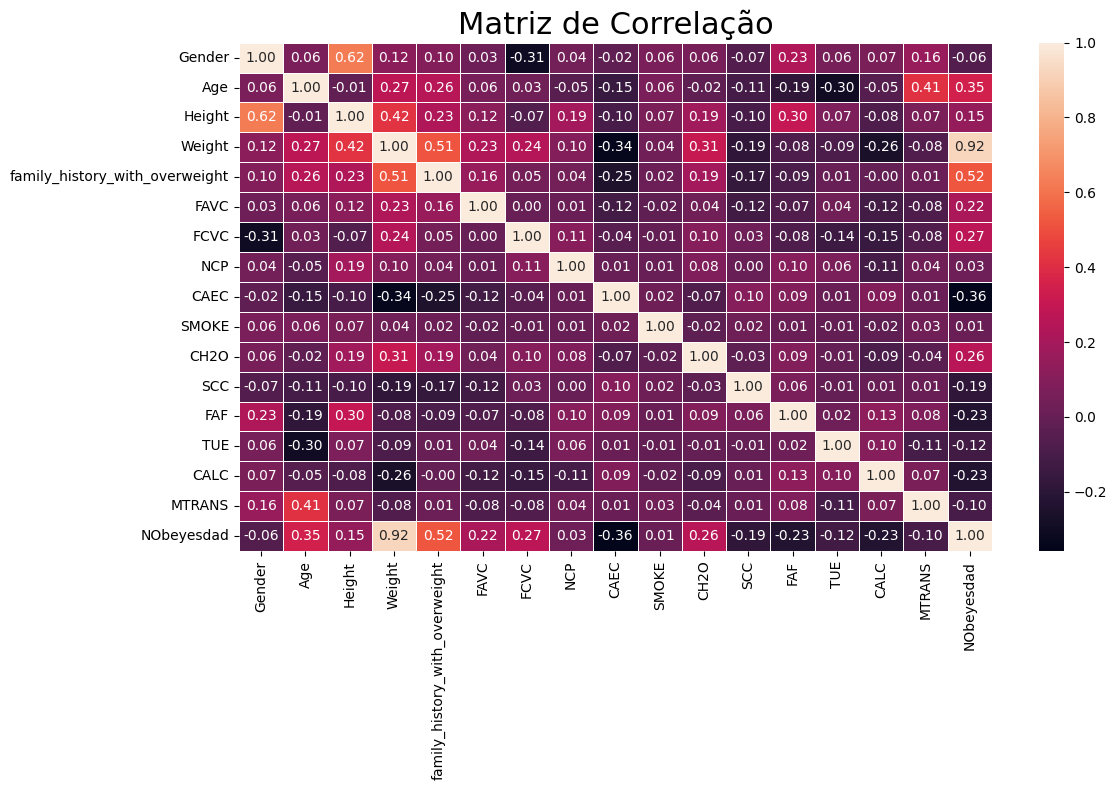

In [71]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação', fontsize=22)  
plt.tight_layout()  
plt.show()

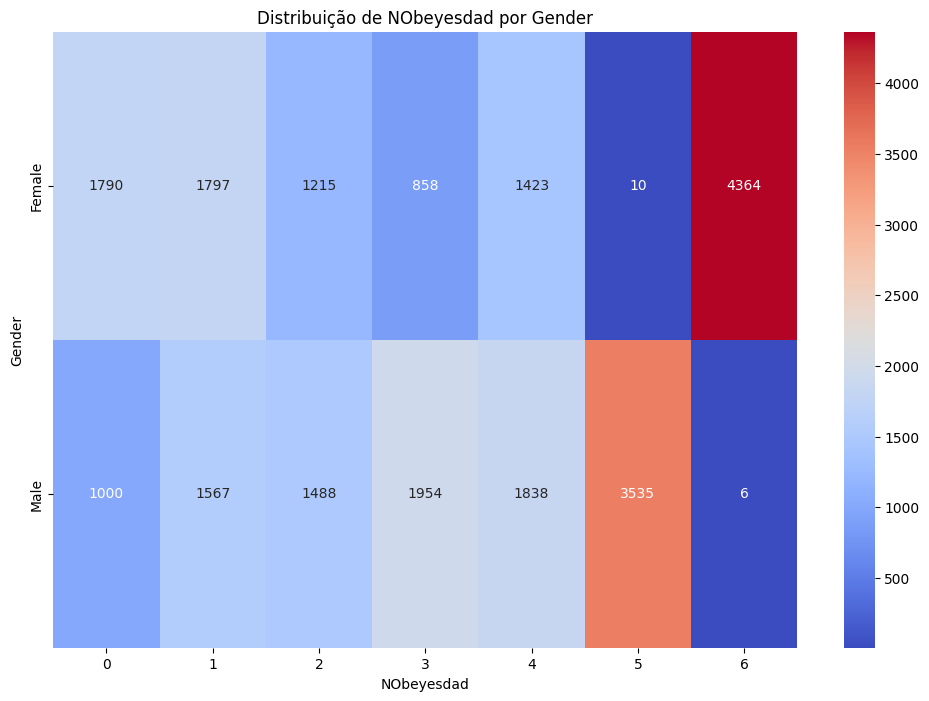

In [72]:
grouped_data = data_concat.groupby(['Gender', 'NObeyesdad']).size().unstack(fill_value=0)

# Plotando os dados
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data, annot=True, cmap='coolwarm', fmt="d")
plt.title('Distribuição de NObeyesdad por Gender')
plt.xlabel('NObeyesdad')
plt.ylabel('Gender')
plt.yticks([0.5, 1.5], ['Female', 'Male'], va='center')
plt.show()

In [74]:
count_female_obesity_type_III = data_concat[(data_concat['Gender'] == 0) & (data_concat['NObeyesdad'] == 6)].shape[0]

print("Número de mulheres com Obesity Type III:", count_female_obesity_type_III)

Número de mulheres com Obesity Type III: 4364


In [75]:
count_female_obesity_type_II = data_concat[(data_concat['Gender'] == 0) & (data_concat['NObeyesdad'] == 5)].shape[0]

print("Número de mulheres com Obesity Type II:", count_female_obesity_type_II)

Número de mulheres com Obesity Type II: 10


In [76]:
data_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22845 entries, 0 to 22868
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22845 non-null  int64  
 1   Age                             22845 non-null  float64
 2   Height                          22845 non-null  float64
 3   Weight                          22845 non-null  float64
 4   family_history_with_overweight  22845 non-null  int64  
 5   FAVC                            22845 non-null  int64  
 6   FCVC                            22845 non-null  float64
 7   NCP                             22845 non-null  float64
 8   CAEC                            22845 non-null  int64  
 9   SMOKE                           22845 non-null  int64  
 10  CH2O                            22845 non-null  float64
 11  SCC                             22845 non-null  int64  
 12  FAF                             22845

ATENCAO ===== TROCAR O TIPO DOS DADOS DE data_concat

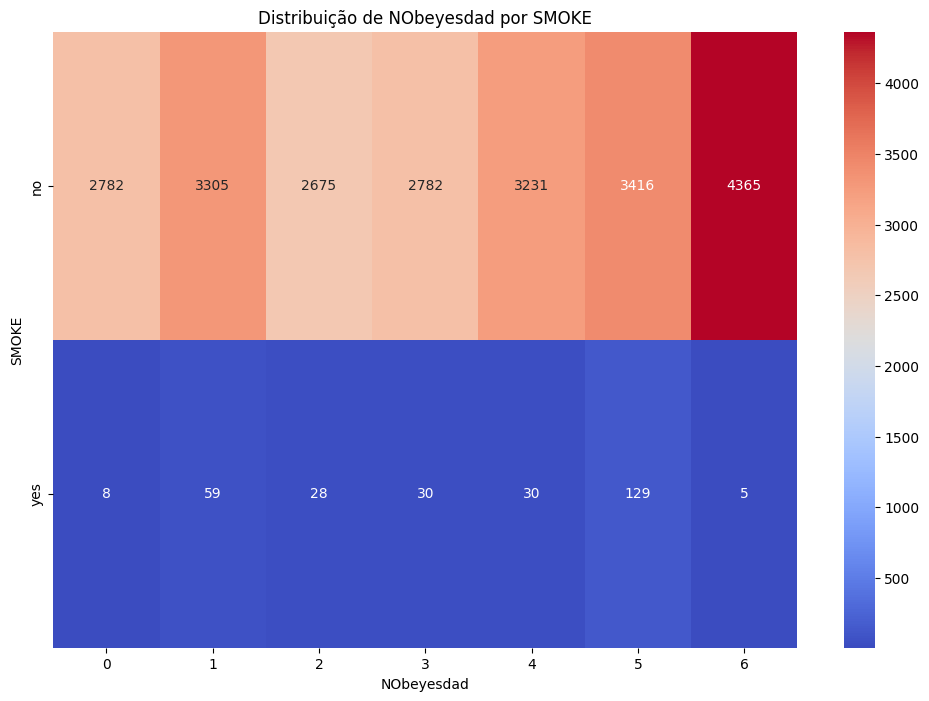

In [79]:
# Plotando os dados com um heatmap
grouped_data = data_concat.groupby(['SMOKE', 'NObeyesdad']).size().unstack(fill_value=0)


plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data, annot=True, cmap='coolwarm', fmt="d")
plt.title('Distribuição de NObeyesdad por SMOKE')
plt.xlabel('NObeyesdad')
plt.ylabel('SMOKE')
plt.yticks([0.5, 1.5], ['no', 'yes'], va='center')  # Ajustando rótulos para corresponder ao mapeamento (0 = No, 1 = Yes)
plt.show()


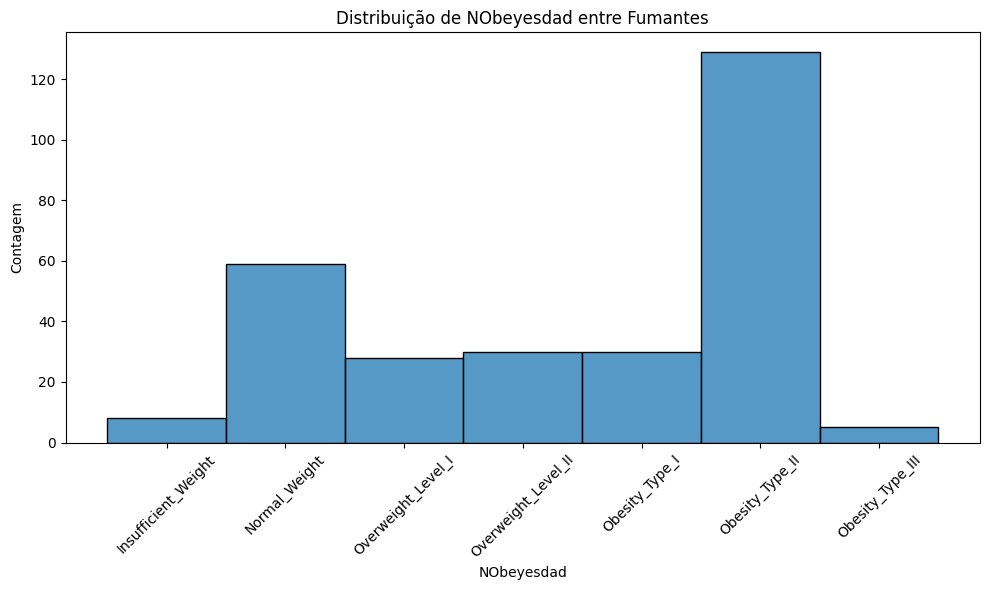

In [83]:
# Filtrar o DataFrame para 'SMOKE' == 1 (yes)
smokers = data_concat[data_concat['SMOKE'] == 1]

# Plotar o histograma para 'NObeyesdad' entre os fumantes
plt.figure(figsize=(10, 6))
ax = sns.histplot(smokers['NObeyesdad'], bins=range(0, 8), kde=False, discrete=True)
plt.title('Distribuição de NObeyesdad entre Fumantes')
plt.xlabel('NObeyesdad')
plt.ylabel('Contagem')


plt.xticks(ticks=range(0, 7), labels=[
    'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
    'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
    'Obesity_Type_III'
], rotation=45)

plt.tight_layout()
plt.show()

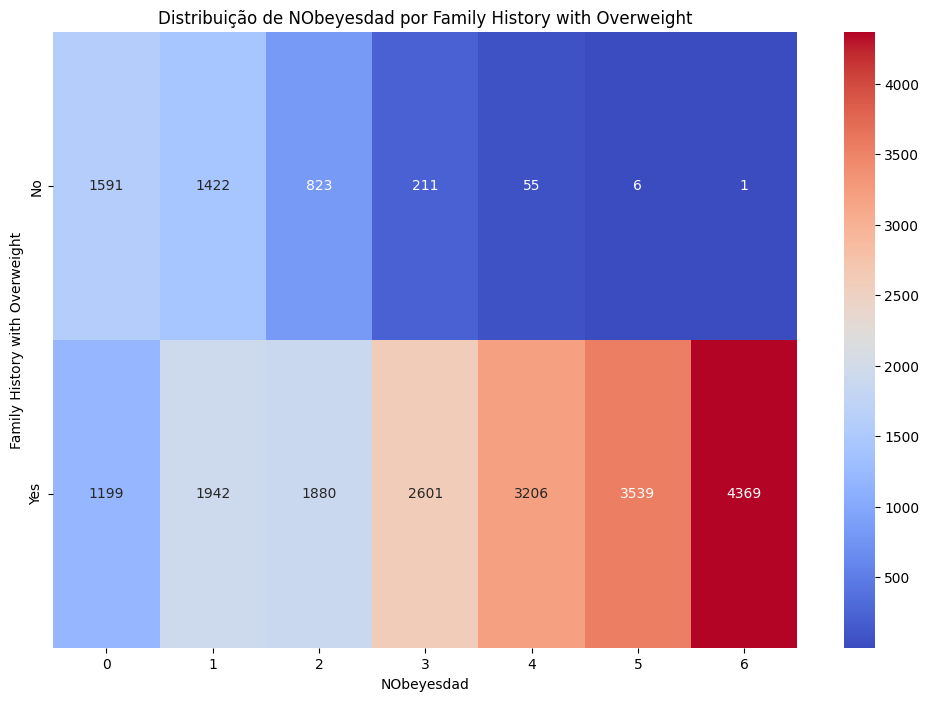

In [84]:
# Agrupando os dados por 'family_history_with_overweight' e 'NObeyesdad'
grouped_data = data_concat.groupby(['family_history_with_overweight', 'NObeyesdad']).size().unstack(fill_value=0)

# Plotando os dados com um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data, annot=True, cmap='coolwarm', fmt="d")
plt.title('Distribuição de NObeyesdad por Family History with Overweight')
plt.xlabel('NObeyesdad')
plt.ylabel('Family History with Overweight')
plt.yticks([0.5, 1.5], ['No', 'Yes'], va='center')  # Ajustando rótulos para corresponder ao mapeamento (0 = No, 1 = Yes)
plt.show()


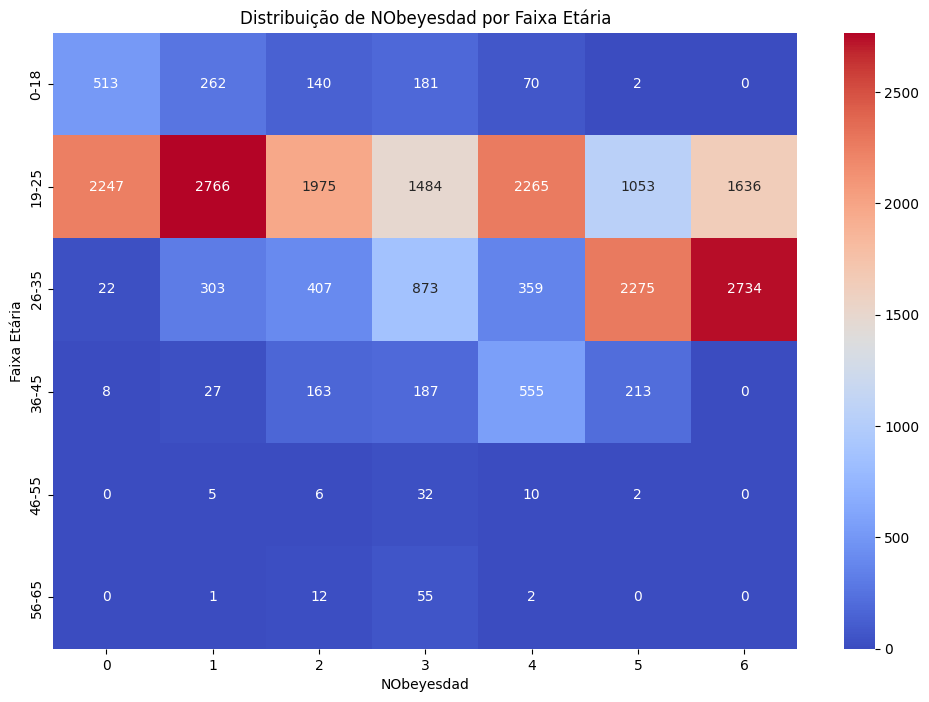

In [86]:
# Criar faixas etárias para a coluna 'Age' de maneira segura, evitando SettingWithCopyWarning
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
data_concat.loc[:, 'Age Group'] = pd.cut(data_concat['Age'], bins=bins, labels=labels, right=False)

# Agrupando os dados por 'Age Group' e 'NObeyesdad' com 'observed=True'
grouped_data = data_concat.groupby(['Age Group', 'NObeyesdad'], observed=True).size().unstack(fill_value=0)

# Plotando os dados com um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data, annot=True, cmap='coolwarm', fmt="d")
plt.title('Distribuição de NObeyesdad por Faixa Etária')
plt.xlabel('NObeyesdad')
plt.ylabel('Faixa Etária')
plt.show()

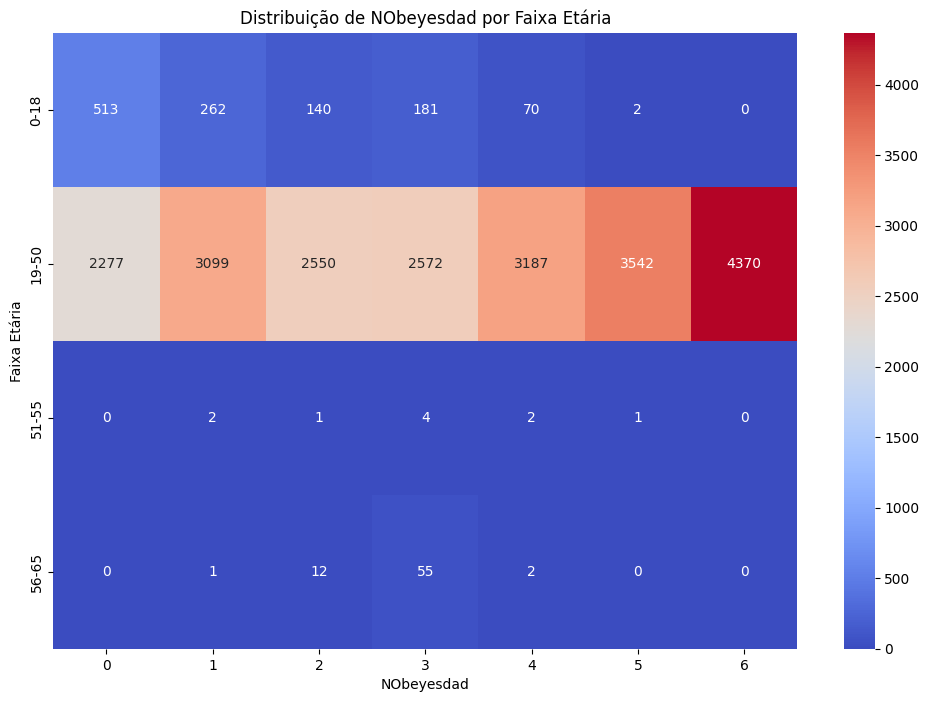

In [92]:

# Criar faixas etárias com uma faixa de '19-50'
bins = [0, 18, 50, 55, 65, 100]  # Ajuste dos bins para incluir '19-50'
labels = ['0-18', '19-50', '51-55', '56-65', '66+']  # Etiquetas ajustadas

# Verificamos o tipo de dados e realizamos a conversão para a categoria, se necessário
if not isinstance(data_concat['Age Group'].dtype, pd.CategoricalDtype):
    data_concat['Age Group'] = pd.Categorical(data_concat['Age Group'], categories=labels, ordered=True)

# Aplicamos o método pd.cut com os novos parâmetros e convertemos explicitamente para o tipo correto
data_concat['Age Group'] = pd.cut(data_concat['Age'], bins=bins, labels=labels, right=False).astype('category')

# Agrupando os dados por 'Age Group' e 'NObeyesdad' com 'observed=True'
grouped_data = data_concat.groupby(['Age Group', 'NObeyesdad'], observed=True).size().unstack(fill_value=0)

# Plotando os dados com um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data, annot=True, cmap='coolwarm', fmt="d")
plt.title('Distribuição de NObeyesdad por Faixa Etária')
plt.xlabel('NObeyesdad')
plt.ylabel('Faixa Etária')
plt.show()


/var/folders/4d/mpf8lqzx4wq9b311g2sn65340000gn/T/ipykernel_93045/3714873465.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data_concat.groupby(['IMC Category', 'NObeyesdad']).size().unstack(fill_value=0)


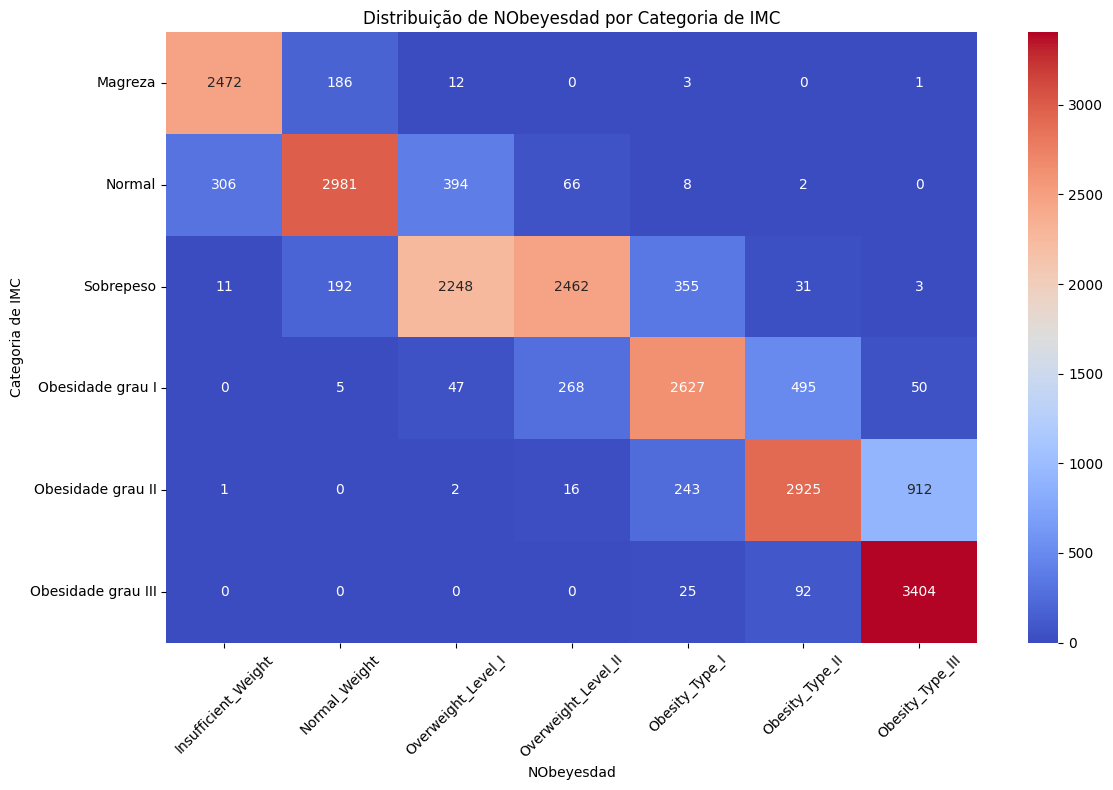

In [103]:

# Verificar se a altura está em metros ou centímetros e converter se necessário
if data_concat['Height'].max() > 3:
    data_concat['Height'] = data_concat['Height'] / 100

# Calcular o IMC
data_concat['IMC'] = data_concat['Weight'] / (data_concat['Height'] ** 2)

# Criar faixas de IMC para agrupamento
bins = [0, 18.5, 24.9, 29.9, 34.9, 40, np.inf]
labels = ['Magreza', 'Normal', 'Sobrepeso', 'Obesidade grau I', 'Obesidade grau II', 'Obesidade grau III']
data_concat['IMC Category'] = pd.cut(data_concat['IMC'], bins=bins, labels=labels)

# Agrupando os dados por 'IMC Category' e 'NObeyesdad'
grouped_data = data_concat.groupby(['IMC Category', 'NObeyesdad']).size().unstack(fill_value=0)

# Plotando os dados com um heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(grouped_data, annot=True, cmap='coolwarm', fmt="d")
plt.title('Distribuição de NObeyesdad por Categoria de IMC')
plt.xlabel('NObeyesdad')
plt.ylabel('Categoria de IMC')

# Ajustar as labels do eixo x para corresponder às categorias de NObeyesdad
ax.set_xticklabels([
    'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
    'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
    'Obesity_Type_III'
], rotation=45)  # Rotação das labels para melhor visualização

plt.tight_layout()
plt.show()


In [96]:
data_concat.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'Age Group', 'IMC', 'IMC Category'],
      dtype='object')

In [98]:
data_concat.head(1)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Age Group,IMC,IMC Category
0,1,24.443011,1.699998,81.66995,1,1,2.0,2.983297,0,0,2.763573,0,0.0,0.976473,0,0,3,19-50,28.259565,Sobrepeso


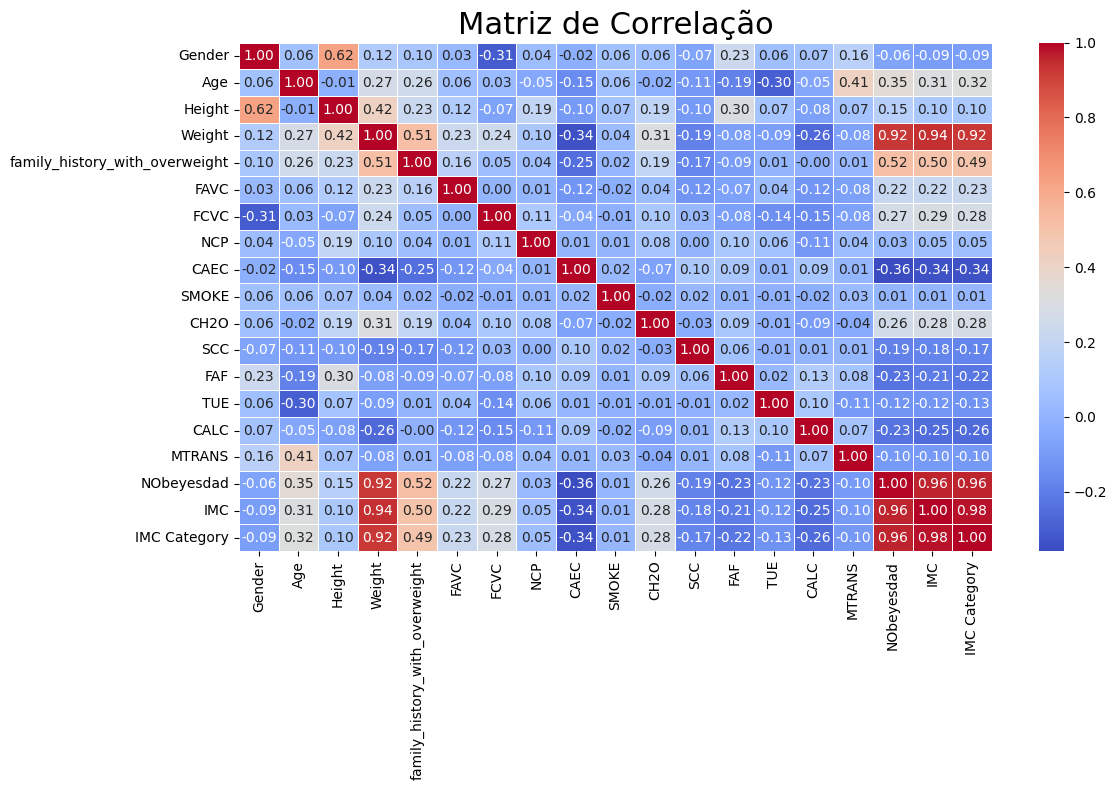

In [102]:
# Mapeamento das categorias de IMC para valores numéricos
mapping = {
    'Magreza': 0,
    'Normal': 1,
    'Sobrepeso': 2,
    'Obesidade grau I': 3,
    'Obesidade grau II': 4,
    'Obesidade grau III': 5
}

# Aplicando o mapeamento no DataFrame
data_concat['IMC Category'] = data_concat['IMC Category'].map(mapping)

# Removendo a coluna 'Age Group' se ainda não foi removida
data_without_age_group = data_concat.drop(columns=['Age Group'], errors='ignore')

# Calculando a matriz de correlação para o DataFrame atualizado
correlation_matrix = data_without_age_group.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5, cmap='coolwarm')
plt.title('Matriz de Correlação', fontsize=22)
plt.tight_layout()
plt.show()


Justifica-se o uso de IMC? 

In [104]:
data_concat.shape

(22845, 20)

In [105]:
data_concat.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'Age Group', 'IMC', 'IMC Category'],
      dtype='object')

QUINTO PASSO: TREINAMENTO DO MODELO

In [106]:
X = data_concat.drop('NObeyesdad', axis=1)
y = data_concat['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [107]:
categorical_features = categorical_features.drop('NObeyesdad')

In [110]:
print(f"Tamanho dos dados para treinamento - X: {X_train.shape}, y: {y_train.shape}")
print(f"Tamanho dos dados para teste  - X: {X_test.shape}, y: {y_test.shape}")

Tamanho dos dados para treinamento - X: (18276, 19), y: (18276,)
Tamanho dos dados para teste  - X: (4569, 19), y: (4569,)


In [111]:
data_concat.drop(['Age Group', 'IMC', 'IMC Category'], axis=1, inplace=True)


In [112]:
data_concat.shape

(22845, 17)

In [113]:
data_concat.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,0,0,2.763573,0,0.000000,0.976473,0,0,3
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,1,1
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,0,0,1.910378,0,0.866045,1.673584,2,0,0
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,0,0,1.674061,0,1.467863,0.780199,0,0,6
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,0,0,1.979848,0,1.967973,0.931721,0,0,3


In [114]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numerical_features),
        ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


# O preprocessador é definido com dois transformadores:
# 'scaler': esse transformador aplica o StandardScaler do sklearn.preprocessing nas 
# características numéricas do conjunto de dados. O StandardScaler padroniza as características 
# removendo a média e escalando para variância unitária. 
# 'encoder': esse transformador aplica o OneHotEncoder do sklearn.preprocessing nas características categóricas do conjunto de dados. 
# O OneHotEncoder codifica as características categóricas como matrizes numéricas usando a codificação one-hot. 

In [115]:
# Define modelos e pipelines
# Um pipeline de aprendizado de máquina é uma forma de codificar e automatizar o fluxo de trabalho 
# necessário para produzir um modelo de aprendizado de máquina. 
# Os pipelines de aprendizado de máquina consistem em várias etapas sequenciais que fazem tudo, 
# desde extração e pré-processamento de dados até treinamento e implantação de modelo.

models = {
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, max_depth=17, random_state=73))
    ]),
    'K-Nearest Neighbors': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier(n_neighbors=1, weights='distance', metric='minkowski', p=2))
    ]),
    'Naive Bayes': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GaussianNB())
    ]),
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(penalty='l2', C=1.0, random_state=0, max_iter=100))
    ]),
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(n_estimators=2, learning_rate=0.25, max_depth=5, random_state=0))
    ])
}

# Inicializar variáveis para armazenar o melhor modelo e sua precisão
best_model = None
best_accuracy = 0
best_model_name = ""

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Print model results
    print(f"Model: {model_name}")
    print(f"Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

    # Atualizar o melhor modelo se a precisão atual for maior que a melhor encontrada
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = model_name

# Print the best model's information
if best_model:
    print(f"The best model is {best_model_name} with an accuracy of {best_accuracy:.2%}")
else:
    print("No best model was identified.")

Model: Random Forest
Accuracy: 0.8966951192821186
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       574
           1       0.83      0.89      0.86       677
           2       0.77      0.75      0.76       525
           3       0.78      0.81      0.79       536
           4       0.93      0.86      0.89       682
           5       0.97      0.97      0.97       697
           6       1.00      1.00      1.00       878

    accuracy                           0.90      4569
   macro avg       0.89      0.89      0.89      4569
weighted avg       0.90      0.90      0.90      4569

[[529  43   1   1   0   0   0]
 [ 35 600  35   7   0   0   0]
 [  4  53 396  65   7   0   0]
 [  0  20  57 432  26   1   0]
 [  0   5  24  45 586  21   1]
 [  0   0   0   6  13 678   0]
 [  0   1   1   0   0   0 876]]
--------------------------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.7461151236594441
              precision    r

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.8702123002845261
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       574
           1       0.87      0.83      0.85       677
           2       0.72      0.73      0.73       525
           3       0.72      0.71      0.71       536
           4       0.86      0.83      0.84       682
           5       0.93      0.97      0.95       697
           6       1.00      1.00      1.00       878

    accuracy                           0.87      4569
   macro avg       0.86      0.86      0.86      4569
weighted avg       0.87      0.87      0.87      4569

[[540  33   0   1   0   0   0]
 [ 64 559  48   6   0   0   0]
 [  3  42 384  85  11   0   0]
 [  0   7  80 380  65   4   0]
 [  1   1  18  49 564  45   4]
 [  0   0   0   7  17 673   0]
 [  0   0   2   0   0   0 876]]
--------------------------------------------------
Model: Gradient Boosting
Accuracy: 0.866053841103086
              precision  

SEXTO PASSO: SELEÇÃO DE HIPERPARÂMETROS 

In [116]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming you have a dictionary called model_accuracies and another dictionary to store metrics
model_metrics = {}

# Example loop where you might evaluate each model (assuming y_test and predictions are defined)
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  # Use appropriate average method
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Store metrics in dictionary
    model_metrics[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# Sort the accuracies dictionary in descending order and create a table
sorted_accuracies = sorted(model_metrics.items(), key=lambda x: x[1]['accuracy'], reverse=True)
print("Model Metrics in Descending Order:")
print(f"{'Model Name':<20} | {'Accuracy':<10} | {'Precision':<10} | {'Recall':<10} | {'F1-Score':<10}")
print("-" * 70)
for model_name, metrics in sorted_accuracies:
    print(f"{model_name:<20} | {metrics['accuracy']:.2%} | {metrics['precision']:.2%} | {metrics['recall']:.2%} | {metrics['f1_score']:.2%}")

Model Metrics in Descending Order:
Model Name           | Accuracy   | Precision  | Recall     | F1-Score  
----------------------------------------------------------------------
Random Forest        | 89.67% | 88.63% | 88.54% | 88.55%
Logistic Regression  | 87.02% | 85.52% | 85.67% | 85.57%
Gradient Boosting    | 86.61% | 85.20% | 84.98% | 85.03%
K-Nearest Neighbors  | 74.61% | 72.42% | 72.35% | 72.35%
Naive Bayes          | 58.98% | 57.71% | 55.73% | 52.12%


In [704]:
# Definindo o pipeline com o pré-processamento e o classificador
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Adicione o 'preprocessor' conforme definido anteriormente
    ('classifier', RandomForestClassifier(random_state=73))
])

# Definindo os parâmetros para a busca de grade
param_grid = {
    'classifier__n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650],
    'classifier__max_depth': [10, 17, 20, 30, None],
    'classifier__min_samples_split': [1, 2, 3, 5, 10]
}

# Configurando o GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=3)

# Treinando o GridSearchCV com o conjunto de treinamento
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_

# Exibindo os melhores parâmetros
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor pontuação de precisão:", grid_search.best_score_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END classifier__max_depth=10, classifier__min_samples_split=1, classifier__n_estimators=100;, score=nan total time=   0.1s
[CV 2/5] END classifier__max_depth=10, classifier__min_samples_split=1, classifier__n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END classifier__max_depth=10, classifier__min_samples_split=1, classifier__n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END classifier__max_depth=10, classifier__min_samples_split=1, classifier__n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END classifier__max_depth=10, classifier__min_samples_split=1, classifier__n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END classifier__max_depth=10, classifier__min_samples_split=1, classifier__n_estimators=150;, score=nan total time=   0.0s
[CV 2/5] END classifier__max_depth=10, classifier__min_samples_split=1, classifier__n_estimators=150;, score=nan total time=   0.0s
[CV 3/5] END

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
300 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fi

Melhores parâmetros: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 450}
Melhor pontuação de precisão: 0.9005739273025417


In [118]:
# Executanto o modelo com os melhores hiperparâmetros
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=450, random_state=42))
])

# Treinamento do modelo com os dados de treinamento
model.fit(X_train, y_train)  

# Avaliação do modelo usando os dados de teste
accuracy = model.score(X_test, y_test)  

print(f"A precisão do modelo é: {accuracy:.2%}")

A precisão do modelo é: 89.80%


In [119]:
pip install scikit-optimize


Note: you may need to restart the kernel to use updated packages.


In [719]:

from skopt import BayesSearchCV
from skopt.space import  Categorical, Integer


search_space = {
    'n_estimators': Integer(10, 1000),
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 5),
    'max_features': Categorical(['sqrt', 'log2', None])
}

# Criando o modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Configurando a busca Bayesiana
bayes_search = BayesSearchCV(
    estimator=rf,
    search_spaces=search_space,
    n_iter=32,  # Número de iterações na busca dos hiperparâmetros
    scoring='accuracy',  # Métrica de desempenho para validação
    cv=5,  # Número de folds na validação cruzada
    n_jobs=-1,  # Número de cores usados na busca (usar -1 para todos)
    random_state=42
)

# Realizando a busca Bayesiana
bayes_search.fit(X, y)

# Resultados
print("Melhor score: ", bayes_search.best_score_)
print("Melhores hiperparâmetros: ", bayes_search.best_params_)

# Uso do modelo com os melhores hiperparâmetros encontrados
best_model = bayes_search.best_estimator_

Melhor score:  0.9059869955885438
Melhores hiperparâmetros:  OrderedDict({'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000})


 Com Otimização Bayesiana o score do modelo Random Forest subiu para 0.9059. 

model = LogisticRegression(max_iter=2500)
model.fit(X_train_encoded, y_train)

Otimizando Naive Bayes - Usando IMC?

In [124]:
encoder = LabelEncoder()
data_test["Gender"]=encoder.fit_transform(data_test["Gender"])
data_test["SMOKE"]=encoder.fit_transform(data_test["SMOKE"])
data_test["SCC"]=encoder.fit_transform(data_test["SCC"])
data_test["FAVC"]
data_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,1,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,0,2.825629,0,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,0,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,0,3.000000,0,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,0,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,0,2.621877,0,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,1,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,0,2.786417,0,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,0,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,0,2.653531,0,0.000000,0.741069,Sometimes,Public_Transportation


In [125]:
data_concat.dtypes

Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
MTRANS                              int64
NObeyesdad                          int64
dtype: object

In [126]:
data_test.dtypes

id                                  int64
Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
dtype: object

In [127]:
X_test_prepared = preprocessor.transform(data_test)


SETIMO PASSO: PREDIÇÃO COM DADOS DE TESTE

In [128]:
pred = pd.DataFrame()
pred['id']=data_test['id'].astype(int)
pred['NObeyesdad'] = model.predict(data_test)
pred.to_csv('/Users/luisguedes/Desktop/UFRJ/CPS-833/sample_submission.csv',index=False)
pred

,id,NObeyesdad
0,20758,5
1,20759,2
2,20760,6
3,20761,4
4,20762,6
...,...,...
13835,34593,3
13836,34594,1
13837,34595,0
13838,34596,1


In [129]:
data_submission=pd.read_csv('/Users/luisguedes/Desktop/UFRJ/CPS-833/sample_submission.csv')

In [130]:
data_submission["NObeyesdad"].value_counts()

NObeyesdad
1    2812
6    2620
5    2093
3    1947
4    1554
2    1420
0    1394
Name: count, dtype: int64

In [131]:
data_submission.shape

(13840, 2)

In [132]:
mapping = {
    0: 'Insufficient_Weight', 
    1: 'Normal_Weight', 
    2: 'Overweight_Level_I',
    3: 'Overweight_Level_II', 
    4: 'Obesity_Type_I', 
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'
}

# Aplicar o mapeamento para converter códigos em nomes
pred['NObeyesdad'] = pred['NObeyesdad'].map(mapping)

# Salvar o DataFrame com os nomes das categorias
pred.to_csv('/Users/luisguedes/Desktop/UFRJ/CPS-833/sample_submission.csv', index=False)

# Exibir o DataFrame
pred

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [133]:

data_submission['NObeyesdad'].map(mapping).value_counts()

NObeyesdad
Normal_Weight          2812
Obesity_Type_III       2620
Obesity_Type_II        2093
Overweight_Level_II    1947
Obesity_Type_I         1554
Overweight_Level_I     1420
Insufficient_Weight    1394
Name: count, dtype: int64

LOCALIZAR DIFERENÇA ENTRE VALORES "NObeyesdad" ANTES E DEPOIS DA SELEÇÃO DE HIPERPARÂMETRO

In [134]:
category_counts = data_submission['NObeyesdad'].map(mapping).value_counts().sort_index()


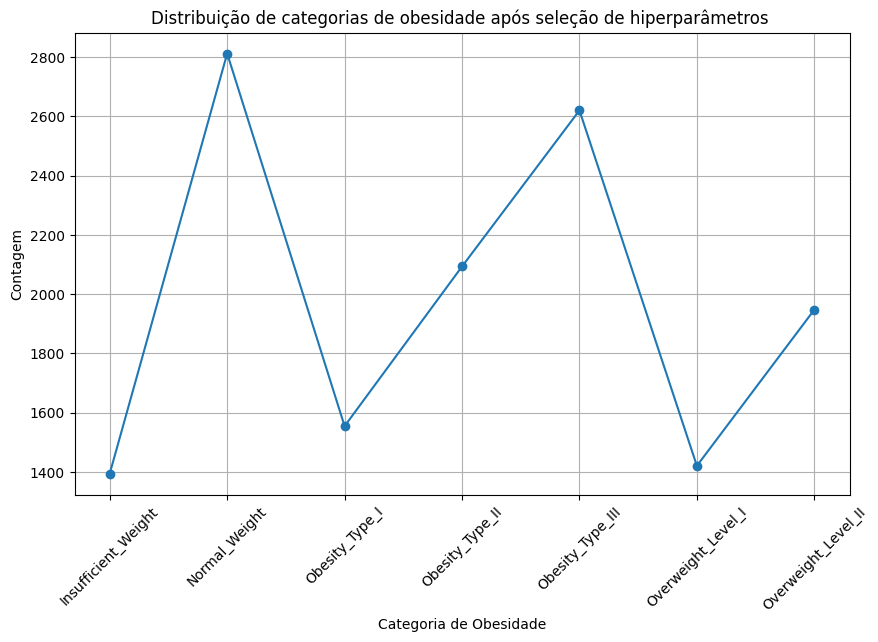

In [135]:
plt.figure(figsize=(10, 6))
plt.plot(category_counts.index, category_counts.values, marker='o', linestyle='-')
plt.title('Distribuição de categorias de obesidade após seleção de hiperparâmetros ')
plt.xlabel('Categoria de Obesidade')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [137]:
contagem_obesidade = data_concat['NObeyesdad'].map(mapping).value_counts()


Fazendo uma comparação entre os resultados 

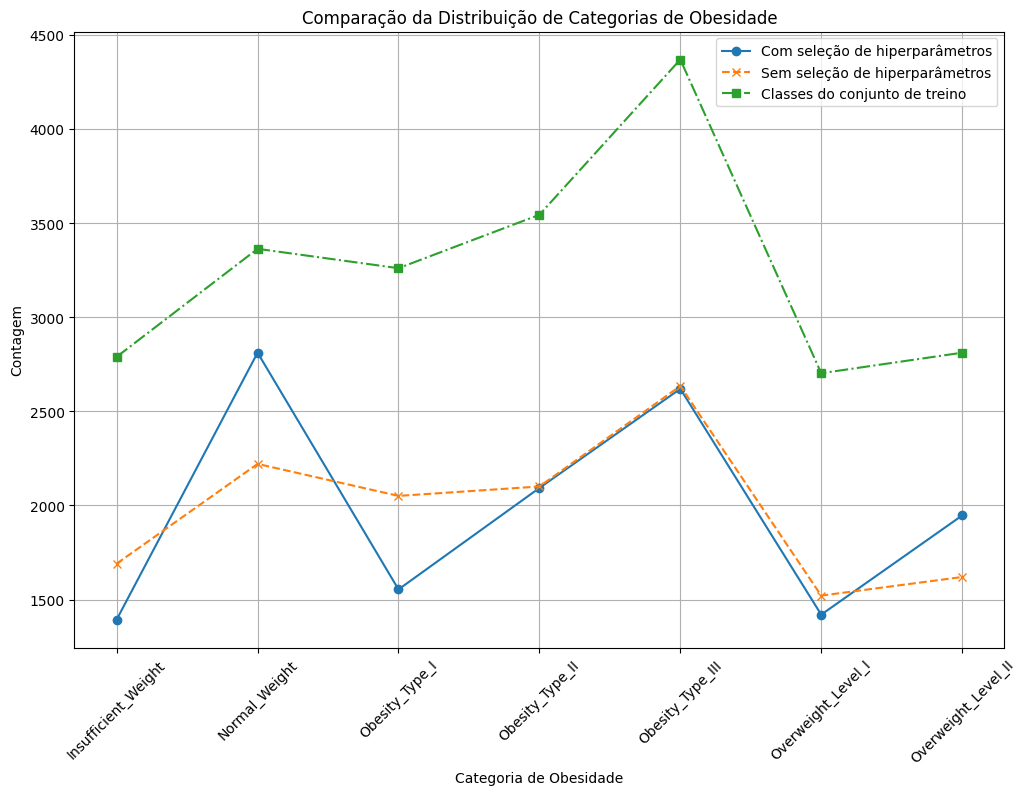

In [138]:
data_without_selec  = {
    'Obesity_Type_III': 2635,
    'Normal_Weight': 2221,
    'Obesity_Type_II': 2101,
    'Obesity_Type_I': 2051,
    'Insufficient_Weight': 1691,
    'Overweight_Level_II': 1620,
    'Overweight_Level_I': 1521
}

submission_series = pd.Series(category_counts).sort_index()
data_without_selec = pd.Series(data_without_selec ).sort_index()
obesity_counts_series = pd.Series(contagem_obesidade).sort_index()



contagem_obesidade = data_concat['NObeyesdad'].map(mapping).value_counts()


# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.plot(submission_series.index, submission_series.values, marker='o', linestyle='-', label='Com seleção de hiperparâmetros')
plt.plot(data_without_selec .index, data_without_selec .values, marker='x', linestyle='--', label='Sem seleção de hiperparâmetros')
plt.plot(obesity_counts_series.index, obesity_counts_series.values, marker='s', linestyle='-.', label='Classes do conjunto de treino')
plt.title('Comparação da Distribuição de Categorias de Obesidade')
plt.xlabel('Categoria de Obesidade')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [142]:
data_submission.shape

(13840, 2)

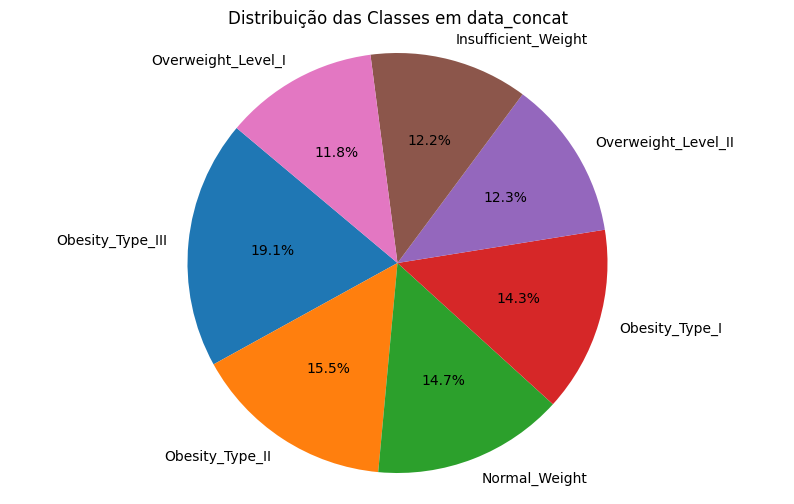

In [143]:
# Calcula a contagem de cada classe
contagem_obesidade = data_concat['NObeyesdad'].map(mapping).value_counts()

# Cria um gráfico de pizza
plt.figure(figsize=(10, 6))
plt.pie(contagem_obesidade, labels=contagem_obesidade.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição das Classes em data_concat')
plt.axis('equal')  # Ajusta a proporção para que o gráfico seja desenhado como um círculo.
plt.show()

In [140]:
data_test.shape

(13840, 17)